In [2]:
!pip install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import iplot, init_notebook_mode
from matplotlib import animation,rc
from mpl_toolkits.basemap import Basemap
import base64
import io
from IPython.display import HTML
%matplotlib inline

# Finding Character Encoding

In [4]:
! pip install chardet

In [5]:
import chardet

with open('/content/globalterrorismdb_0718dist.csv', 'rb') as f:
    result = chardet.detect(f.read())

print(result['encoding'])

Windows-1252


# Getting Data Ready

In [6]:
terrorism = pd.read_csv('/content/globalterrorismdb_0718dist.csv',encoding='Windows-1252')

<ipython-input-6-3876277b2053>:1: DtypeWarning:

Columns (4,31,33,76,94,96) have mixed types. Specify dtype option on import or set low_memory=False.



In [7]:
terrorism.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [8]:
terrorism=terrorism[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terrorism['casualties']=terrorism['Killed']+terrorism['Wounded']
terrorism.head()

<ipython-input-8-d40a36b817d2>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualties
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


In [9]:
terrorism.shape

(5096, 18)

In [10]:
terrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5096 entries, 0 to 5095
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         5096 non-null   int64  
 1   Month        5096 non-null   int64  
 2   Day          5096 non-null   int64  
 3   Country      5096 non-null   object 
 4   Region       5096 non-null   object 
 5   city         5096 non-null   object 
 6   latitude     5006 non-null   float64
 7   longitude    5006 non-null   float64
 8   AttackType   5096 non-null   object 
 9   Killed       4484 non-null   float64
 10  Wounded      3308 non-null   float64
 11  Target       5039 non-null   object 
 12  Summary      798 non-null    object 
 13  Group        5095 non-null   object 
 14  Target_type  5095 non-null   object 
 15  Weapon_type  5095 non-null   object 
 16  Motive       536 non-null    object 
 17  casualties   3294 non-null   float64
dtypes: float64(5), int64(3), object(10)
memory usage

In [11]:
terrorism.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded,casualties
count,5096.000000,5096.000000,5096.000000,5006.000000,5006.000000,4484.000000,3308.000000,3294.000000
mean,1973.809066,6.158359,15.303375,36.559454,-26.458558,0.735950,1.107920,1.550395
std,2.337862,3.293888,9.140459,22.836022,51.475161,3.223387,8.868704,10.019585
min,1970.000000,0.000000,0.000000,-43.532054,-157.818968,0.000000,0.000000,0.000000
25%,1972.000000,3.000000,7.000000,35.800916,-73.931351,0.000000,0.000000,0.000000
50%,1974.000000,6.000000,15.000000,41.400635,-5.956210,0.000000,0.000000,0.000000
75%,1976.000000,9.000000,23.000000,52.501530,7.519113,1.000000,0.000000,0.000000
max,1977.000000,12.000000,31.000000,59.332788,172.636225,92.000000,285.000000,295.000000


# **Basic Analysis and Cleaning**

In [12]:
terrorism.isnull().sum()

Year              0
Month             0
Day               0
Country           0
Region            0
city              0
latitude         90
longitude        90
AttackType        0
Killed          612
Wounded        1788
Target           57
Summary        4298
Group             1
Target_type       1
Weapon_type       1
Motive         4560
casualties     1802
dtype: int64

In [13]:
print('Country with Highest Terrorist Attacks:',terrorism['Country'].value_counts().index[0])
print('Country with Lowest Terrorist Attacks:',terrorism['Country'].value_counts().index[-1])
print('Regions with Highest Terrorist Attacks:',terrorism['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',terrorism['Killed'].max(),'that took place in',terrorism.loc[terrorism['Killed'].idxmax()].Country)
print('Most Targeted Place by Terrorist:',terrorism['Target'].value_counts().index[0])

Country with Highest Terrorist Attacks: United States
Country with Lowest Terrorist Attacks: Saudi Arabia
Regions with Highest Terrorist Attacks: Western Europe
Maximum people killed in an attack are: 92.0 that took place in Argentina
Most Targeted Place by Terrorist: Bank


<ipython-input-14-08bb6f67b20b>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




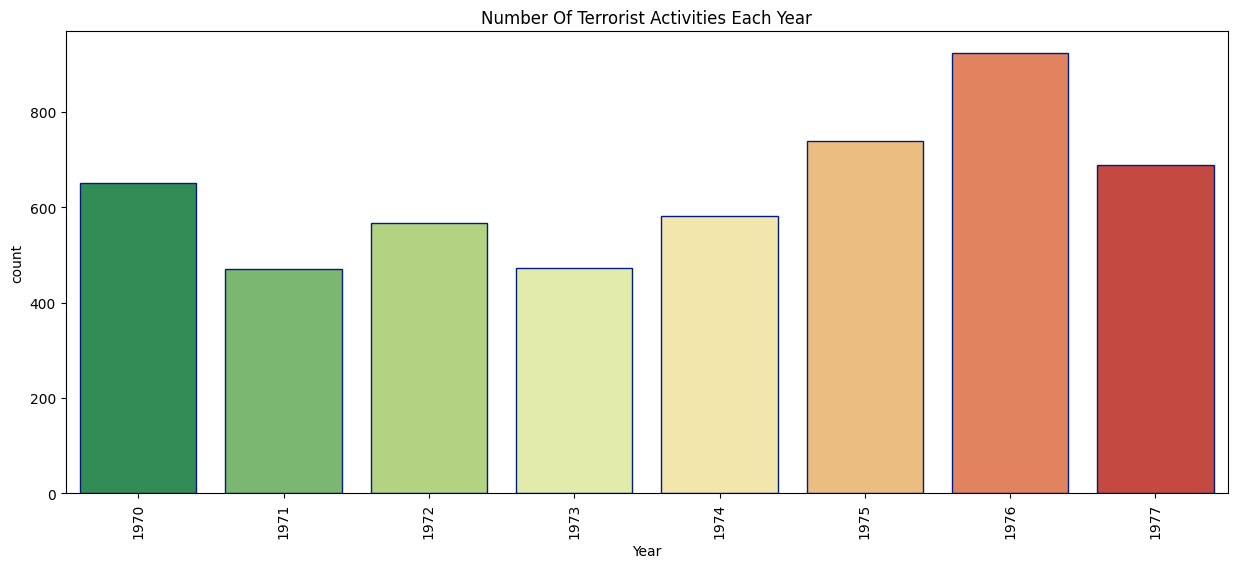

In [14]:
plt.subplots(figsize=(15,6))
sns.countplot(data=terrorism,x='Year',palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

<ipython-input-15-30a76a3612d0>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




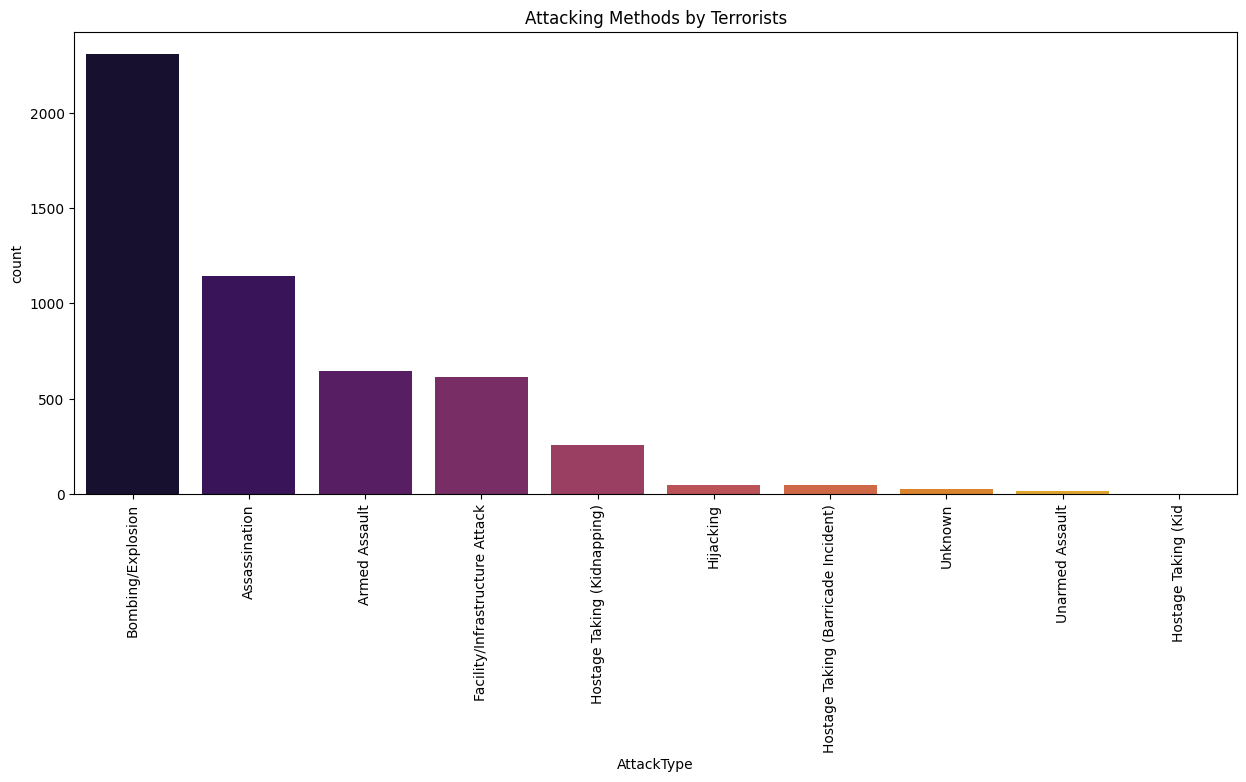

In [15]:
plt.subplots(figsize=(15,6))
sns.countplot(data=terrorism,x='AttackType',palette='inferno',order=terrorism['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

<ipython-input-16-6505188f2961>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




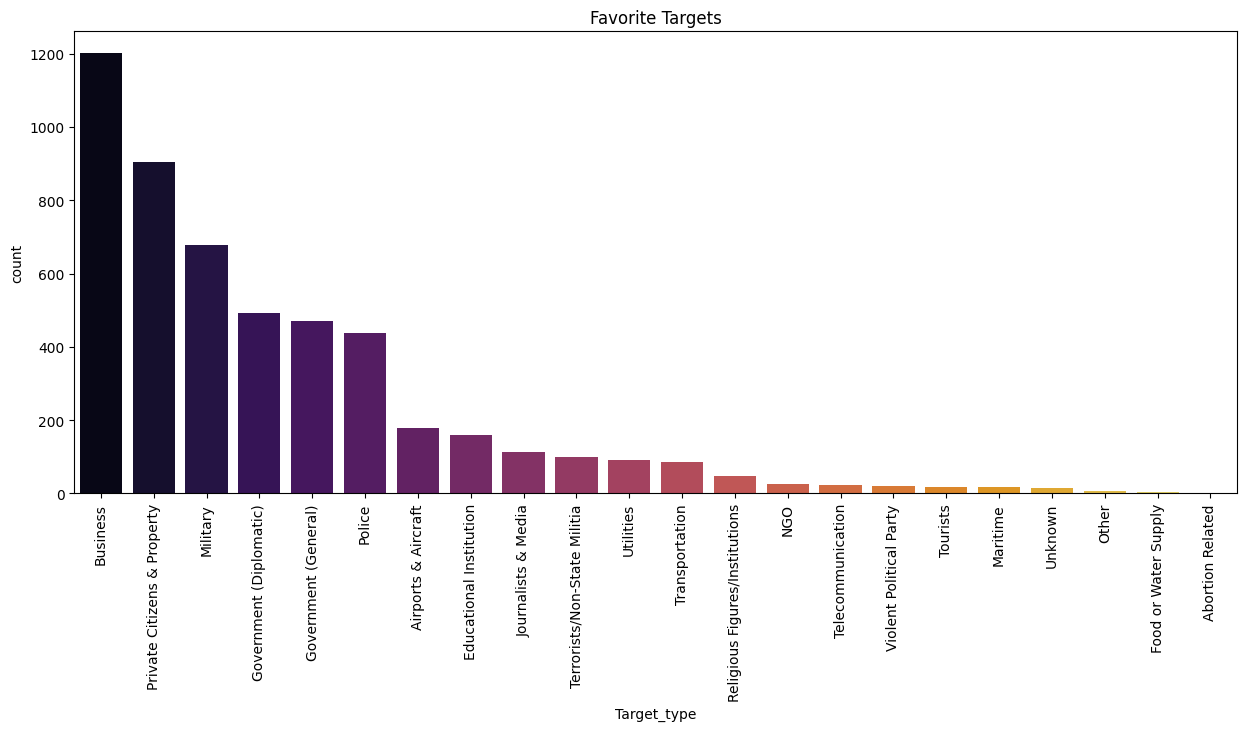

In [16]:
plt.subplots(figsize=(15, 6))
order = terrorism['Target_type'].value_counts().index
sns.countplot(data=terrorism, x='Target_type', palette='inferno', order=order)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()

**Number Of People Killed by Terrorist**

In [17]:
killed_people_by_terrorist = terrorism.groupby('Country')['Killed'].sum()
killed_people_by_terrorist = killed_people_by_terrorist.reset_index()
top_n_countries = killed_people_by_terrorist.nlargest(10, 'Killed')

In [18]:
top_n_countries

,Country,Killed
84,United Kingdom,1537.0
4,Argentina,298.0
85,United States,154.0
38,Israel,132.0
30,Greece,114.0
39,Italy,103.0
72,Spain,99.0
62,Philippines,94.0
70,South Vietnam,81.0
9,Barbados,73.0


<ipython-input-19-5ffc98fdab55>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




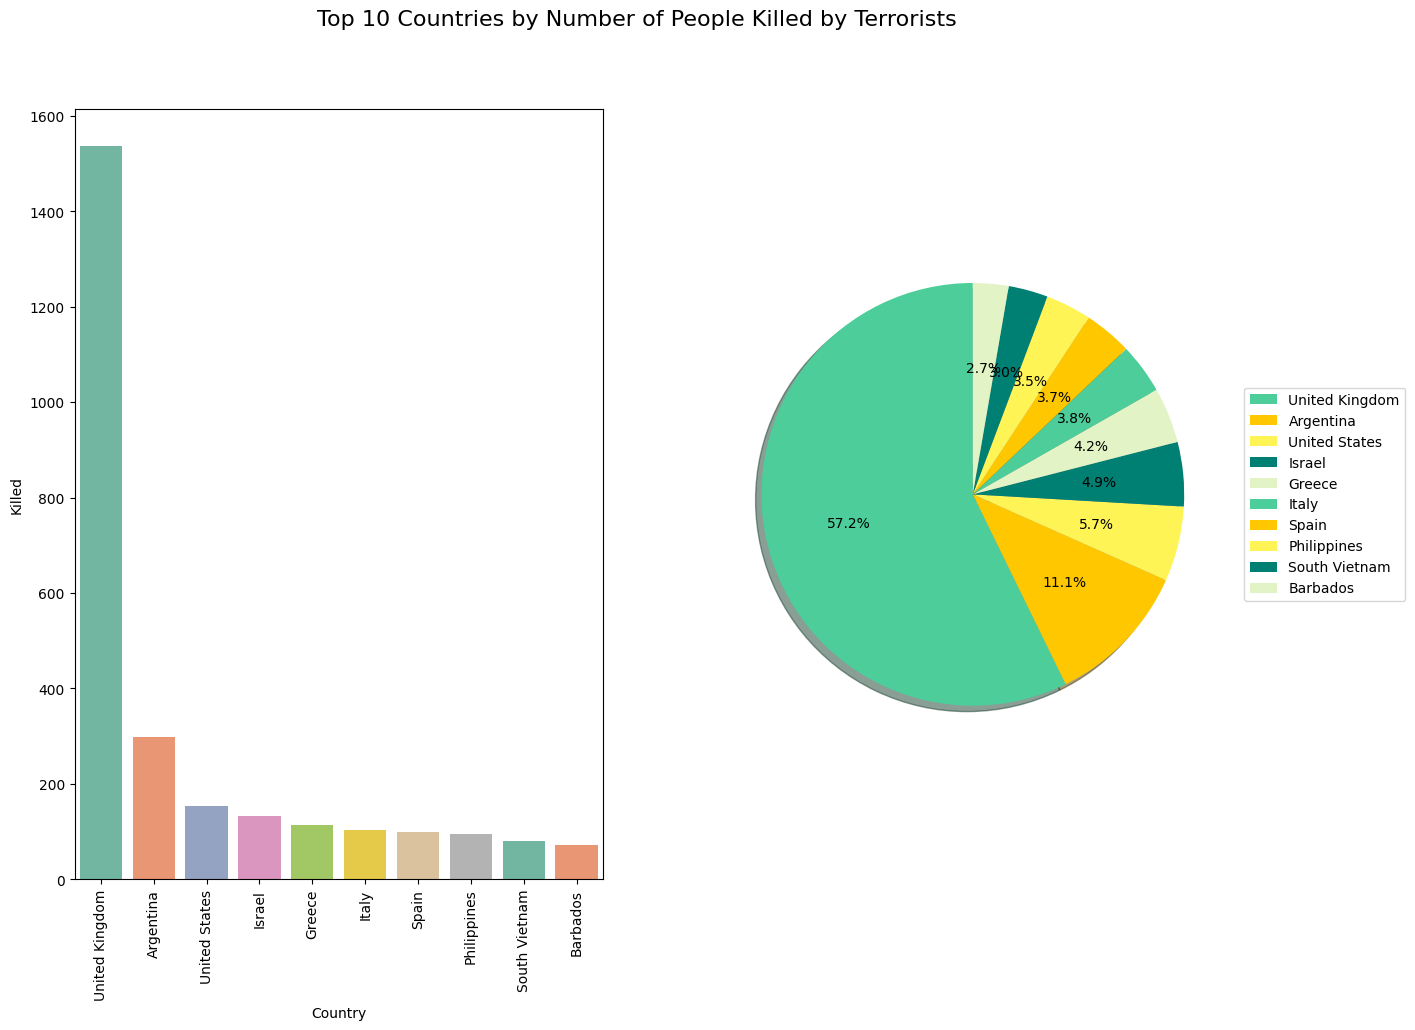

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
color = ['#4CCD99', '#FFC700', '#FFF455', '#007F73', '#E2F4C5']

# Count plot
barplot = sns.barplot(data=top_n_countries, x='Country',y='Killed', palette='Set2', ax=axes[0])
axes[0].tick_params(axis='x', rotation=90)

# Pie chart
axes[1].pie(x=top_n_countries['Killed'], autopct='%1.1f%%', startangle=90, shadow=True, colors=color, labels=None)
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), labels=top_n_countries['Country'])
plt.suptitle('Top 10 Countries by Number of People Killed by Terrorists', fontsize=16)


plt.show()

**Global Terrorist Activity**

In [20]:
# Create the map with a built-in Mapbox style (no token required)
fig = px.scatter_mapbox(data_frame=terrorism, lat='latitude', lon='longitude', hover_name='city',
                        hover_data=['Country','city','Killed', 'Year', 'Motive'], zoom=3, height=600,
                        mapbox_style="carto-positron")

# Show the map
fig.show()

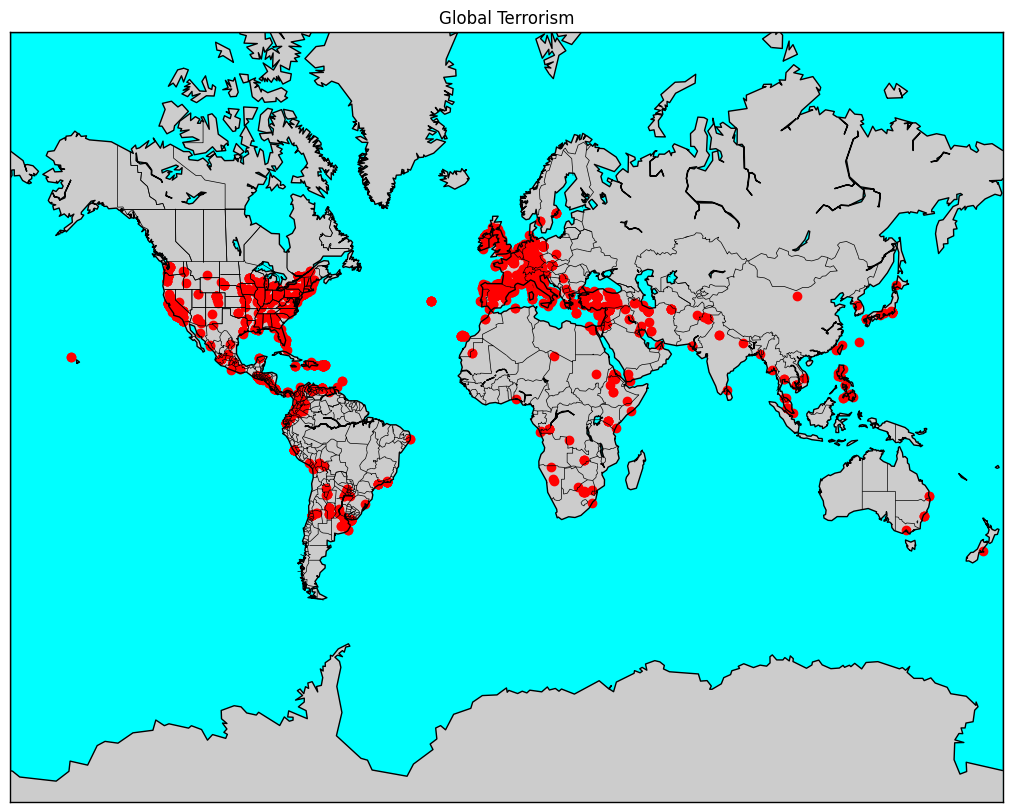

In [21]:
plt.figure(figsize=(15, 10))
m = Basemap(projection = 'merc',llcrnrlat=-80, urcrnrlat=80,
              llcrnrlon=-180, urcrnrlon=180, resolution='c')

m.drawcoastlines()
m.drawcountries()
m.fillcontinents(lake_color='aqua')
m.drawmapboundary(fill_color='aqua')
m.drawstates()

lons = terrorism['longitude'].values
lats = terrorism['latitude'].values
x, y = m(lons, lats)
m.scatter(x, y, marker='o', color='r')

# Add title and show the plot
plt.title('Global Terrorism')
plt.show()

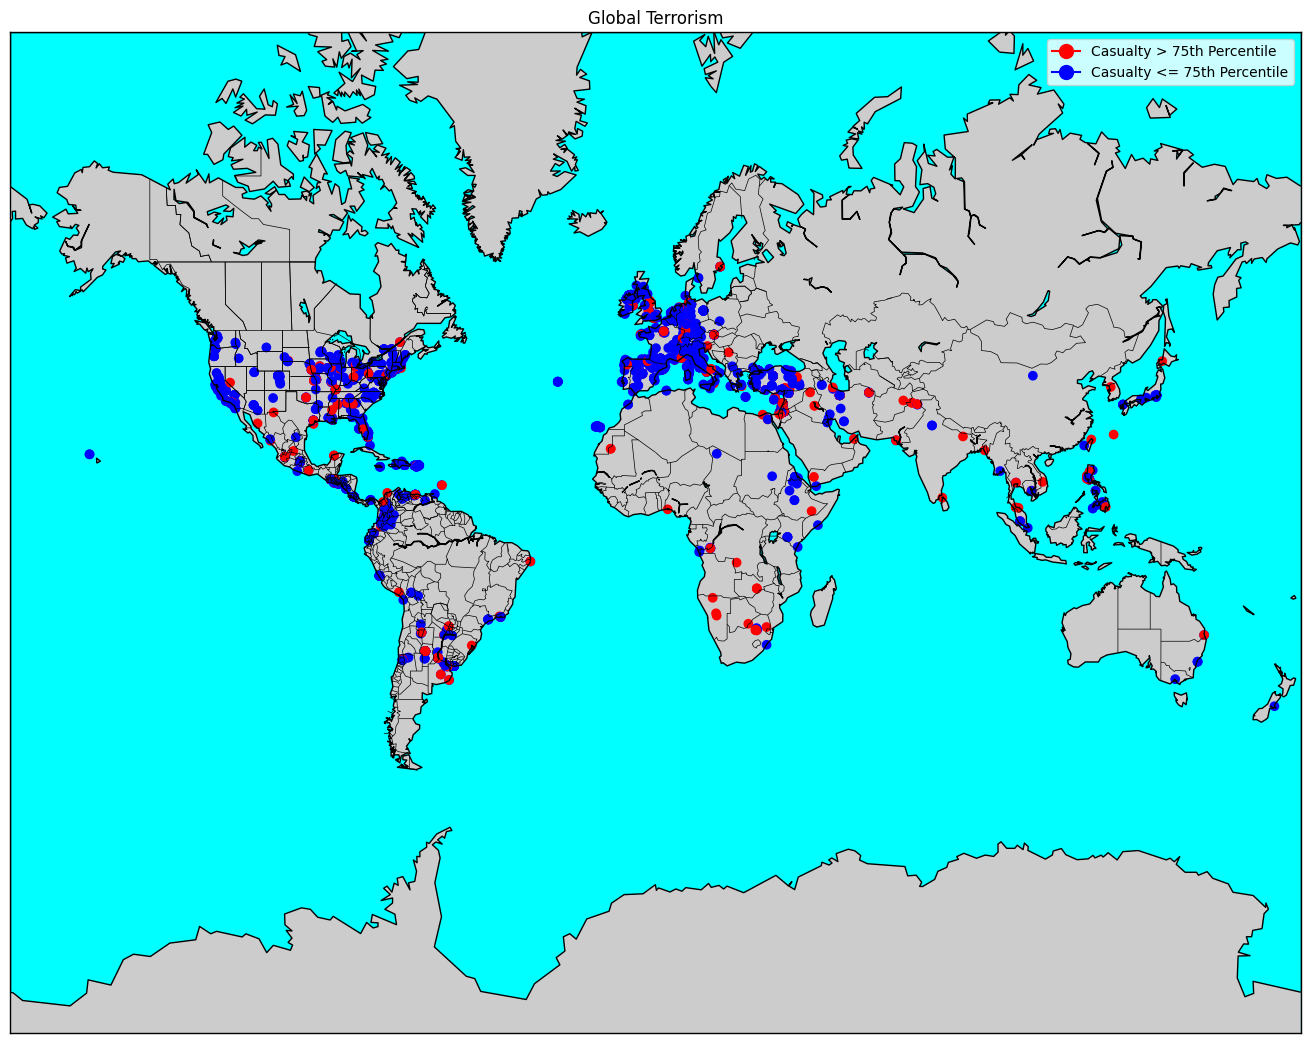

In [23]:
plt.figure(figsize=(18, 13))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80,
            llcrnrlon=-180, urcrnrlon=180, resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(lake_color='aqua')
m.drawmapboundary(fill_color='aqua')
m.drawstates()
casualty_threshold = np.percentile(terrorism['casualties'].dropna(), 75)
lons = terrorism['longitude'].values
lats = terrorism['latitude'].values
x, y = m(lons, lats)
colors = np.where(terrorism['casualties'] > casualty_threshold, 'r', 'b')
m.scatter(x, y, marker='o', color=colors)

# Add legend manually
red_patch = plt.Line2D([0], [0], marker='o', color='r', label='Casualty > 75th Percentile', markersize=10)
blue_patch = plt.Line2D([0], [0], marker='o', color='b', label='Casualty <= 75th Percentile', markersize=10)
plt.legend(handles=[red_patch, blue_patch])

plt.title('Global Terrorism')
plt.show()

**Trend in Terrorist Activity**

In [24]:
grouped_data = terrorism.groupby(['Region', 'Year','Country'])['casualties'].sum().reset_index()

# Plot the bar chart with the grouped data
fig = px.bar(grouped_data, x='Region', y='casualties', animation_frame='Year',animation_group='Country', color='Region',
              hover_data=['Country'],
             labels={'casualties': 'Casualties', 'Country': 'Country'},
             title='Casualties by Region and Year with Country Details')
fig.show()

**Terrorist Group**

In [25]:
terrorism['Group'].value_counts()

Group
Unknown                                           1211
Irish Republican Army (IRA)                        669
Protestant extremists                              184
Left-Wing Militants                                169
Ulster Volunteer Force (UVF)                       159
                                                  ... 
Supporters of Charles Manson                         1
Revolutionary Committee of Mozambique (COREMO)       1
Military Liberation Front of Colombia                1
Iranians                                             1
MANO-D                                               1
Name: count, Length: 343, dtype: int64

<ipython-input-26-4a2e15968b28>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




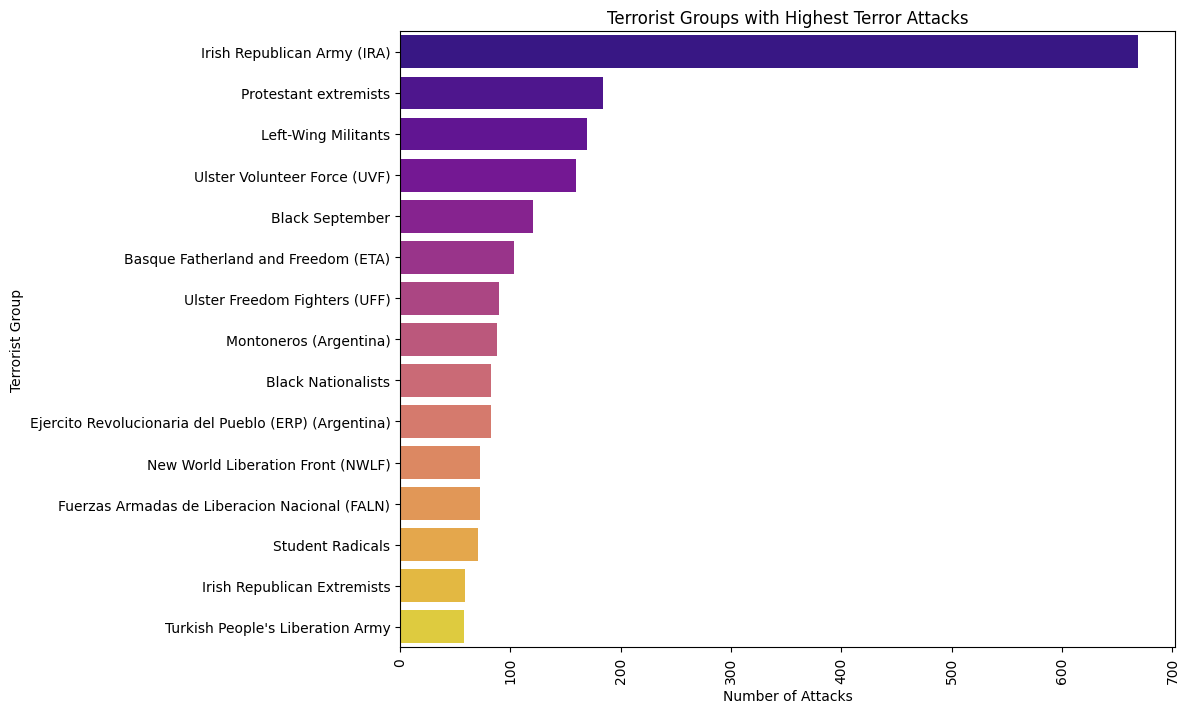

In [26]:
top_groups = terrorism['Group'].value_counts()[1:16]

# Plot the barplot
plt.figure(figsize=(10, 8))
sns.barplot(x=top_groups.values, y=top_groups.index, palette='plasma')

plt.xticks(rotation=90)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('Terrorist Group')
plt.show()

In [27]:
! pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 17.5 MB/s eta 0:00:00


In [28]:
! pip install dash-bootstrap-components

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 1.6 MB/s eta 0:00:00


In [29]:
import dash
from dash import dcc, html, Input, Output, State
import plotly.graph_objs as go
import dash_bootstrap_components as dbc # changing Theme

In [30]:
# Create Dash app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.FLATLY])

# Create Dash layout
app.layout = dbc.Container([
    html.H1("Terrorism In World", style={'text-align': 'center'}),
    dbc.Row([
        dbc.Col([
            dcc.Dropdown(id='Country-dropdown',
                         options=sorted([{'label': country, 'value': country} for country in terrorism['Country'].unique()], key=lambda x: x['label']),
                         value=None,
                         placeholder='Select a Country',
                         style={'color': 'Black', 'font-size': 20}),
        ]),
        dbc.Col([
            dcc.Dropdown(id='year-dropdown',
                         options=[{'label': 'All', 'value': 'All'}] + [{'label': str(year), 'value': year} for year in terrorism['Year'].unique()],
                         value=None,
                         placeholder='Select a Year',
                         style={'color': 'Black', 'font-size': 20}),
        ]),
    ]),
    html.Br(),
    html.Div(id='output_container', children=[]),
    html.Br(),
    dbc.Row([
        dbc.Col([
            dcc.Graph(id='Country-map', figure={}),
        ]),
        dbc.Col([
            dbc.Row([
                dcc.Graph(id='pie-chart', figure={}),
            ]),
            dbc.Row([
                dcc.Graph(id='bar-chart', figure={})
            ])
        ])
    ]),
], fluid=True)

# Callback Function
@app.callback(
   [Output(component_id='output_container', component_property='children'),
    Output(component_id='Country-map', component_property='figure'),
    Output(component_id='pie-chart', component_property='figure'),
    Output(component_id='bar-chart', component_property='figure')],
    [Input(component_id='Country-dropdown', component_property='value'),
     Input(component_id='year-dropdown', component_property='value')]
)
def updated_map(selected_country, selected_year):
    print(f"Selected country: {selected_country}, Selected year: {selected_year}")

    if selected_country is None or selected_year is None:
        # Handle case where inputs are None
        return "Please select a country and year", {}, {}, {}

    if selected_year == 'All':
        filtered_data = terrorism[terrorism['Country'] == selected_country]
    else:
        filtered_data = terrorism[(terrorism['Country'] == selected_country) & (terrorism['Year'] == selected_year)]

    container = f"The country chosen by user was: {selected_country}, and the year: {selected_year}"

    # Create scatter map figure
    fig_map = px.scatter_mapbox(filtered_data, lat="latitude", lon="longitude", hover_name="Country", hover_data=['city','Year','Killed'],
                                color_discrete_sequence=["fuchsia"], zoom=3, height=600)
    fig_map.update_layout(mapbox_style="open-street-map")
    fig_map.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})

    # Calculate total casualties
    total_killed = filtered_data['Killed'].sum()
    total_wounded = filtered_data['Wounded'].sum()
    total_casualties = filtered_data['casualties'].sum()

    # Create pie chart figure
    if total_casualties == 0:
        fig_pie = px.pie(names=['No Casualties'], values=[1], color_discrete_sequence=['green'],
                         title='No Casualties')
    else:
        fig_pie = px.pie(names=['Killed', 'Wounded'], values=[total_killed, total_wounded],
                         title=f'Total Casualties: {total_casualties}')

    # Filter data for top cities
    top_cities_data = filtered_data.groupby('city').sum().sort_values(by='casualties', ascending=False).head(5)

    # Create bar chart for top 5 most affected cities
    fig_bar = go.Figure(go.Bar(
        y=top_cities_data.index,
        x=top_cities_data['casualties'],
        orientation='h',
        marker=dict(color='royalblue'),
        name='Top 5 Most Affected Cities'
    ))
    fig_bar.update_layout(title='Top Most Affected Cities',
                          xaxis_title="Number of Casualties",
                          yaxis_title="City",
                          yaxis=dict(autorange="reversed"))

    return container, fig_map, fig_pie, fig_bar


# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>


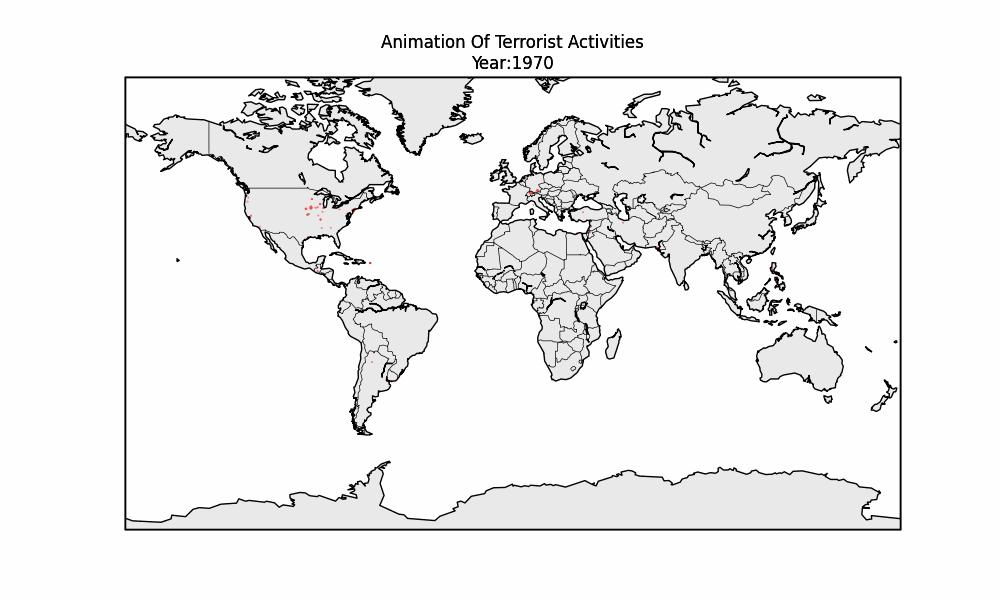

In [31]:
fig = plt.figure(figsize=(10, 6))

# Define the animate function
def animate(Year):
    # Clear the current axes
    ax = plt.axes()
    ax.clear()

    # Set title for the plot including the current year
    ax.set_title('Animation Of Terrorist Activities' + '\n' + 'Year:' + str(Year))

    # Create a Basemap object with specified projection and map boundaries
    m6 = Basemap(projection='mill', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, lat_ts=20, resolution='c')

    lat6 = list(terrorism[terrorism['Year'] == Year].latitude)
    long6 = list(terrorism[terrorism['Year'] == Year].longitude)

    # Convert latitude and longitude to map coordinates
    x6, y6 = m6(long6, lat6)


    m6.scatter(x6, y6, s=[(kill + wound) * 0.1 for kill, wound in zip(terrorism[terrorism['Year'] == Year].Killed, terrorism[terrorism['Year'] == Year].Wounded)], color='r')

    # Draw coastlines, countries, and fill continents
    m6.drawcoastlines()
    m6.drawcountries()
    m6.fillcontinents(zorder=1, alpha=0.4)

    # Draw map boundary
    m6.drawmapboundary()

# Create the animation
ani = animation.FuncAnimation(fig, animate, list(terrorism.Year.unique()), interval=1500)

# Save the animation as a GIF file
ani.save('animation.gif', writer='imagemagick', fps=1)

# Close the figure
plt.close(1)

# Read the GIF file and encode it to base64
filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)

# Display the animation in HTML
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))